## Disease Network 실습 using Python
* 진단 score 테이블 생성 예제 

### Requirement
* Dignosis progression network와 같이 이전 진단과 이후 진단에 대한 $D_i$ x $D_j$ Matrix를 생성한다.
<br/>
* Matrix의 score(점수)는 카운트의 백분율 값으로 환산한다.
<br/>

* 식은 다음과 같이 정의한다.
    * $B\over A$ ; $A$: 이전 진단 $D_i$의 총 카운트, $B$: 이전 진단 $D_i$을 가지고 있는 이후 진단 $D_j$의 총 카운트

<br/>

* **단, 환자 개개인의 반복 측정으로 인해 카운트 계산 중 다음 환자로 넘어갈 경우를 고려해야 한다.**

Import the Pandas, Numpy

In [1]:
import pandas as pd
import pandasgui as gui
import numpy as np

Load data set (.sas)

In [2]:
pd_sas = pd.read_sas('nsc2_edu_m20.sas7bdat', format='sas7bdat')
pd_sas

,RN_INDI,RN_KEY,RN_INST,MDCARE_STRT_DT,FORM_CD,SICK_SYM1,SICK_SYM2,OPRTN_YN,MDCARE_DD_CNT,VSHSP_DD_CNT,TOT_PRSC_DD_CNT,MCARE_RSLT_TYPE,ED_RC_TOT_AMT,EDC_SBA,EDC_INSUR_BRDN_AMT,SPCF_SYM_TYPE
0,3050415.0,b'20060000000008',203739.0,b'20060113',b'03',b'C20',NaN,b'0',1.0,1.0,0.0,b'1',10410.0,0.0,10410.0,b'V027'
1,6771465.0,b'20060000000011',876467.0,b'20060105',b'03',b'S335',NaN,b'0',1.0,1.0,0.0,b'1',14060.0,1500.0,12560.0,NaN
2,9238266.0,b'20060000000013',396247.0,b'20060118',b'03',b'R104',NaN,b'0',1.0,1.0,0.0,b'1',17780.0,5330.0,12450.0,NaN
3,2518883.0,b'20060000000015',192322.0,b'20060107',b'03',b'I10',b'I70',b'0',6.0,6.0,33.0,b'1',55690.0,9000.0,46690.0,NaN
4,2251892.0,b'20060000000020',503221.0,b'20060102',b'02',b'J189',b'J459',b'0',21.0,12.0,0.0,b'1',2650240.0,602890.0,2047350.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137862,9817912.0,b'20120000075216',256194.0,b'20121224',b'03',b'J029',b'J303',b'0',1.0,1.0,3.0,b'1',9220.0,2700.0,6520.0,NaN
137863,9799437.0,b'20120000075217',135151.0,b'20121208',b'03',b'J060',b'J304',b'0',1.0,1.0,3.0,b'1',11230.0,3300.0,7930.0,NaN
137864,9804004.0,b'20120000075218',252557.0,b'20121214',b'03',b'J00',b'J209',b'0',1.0,1.0,3.0,b'1',9210.0,2700.0,6510.0,NaN
137865,9799437.0,b'20120000075219',135151.0,b'20121226',b'03',b'J0141',b'J303',b'0',1.0,1.0,3.0,b'1',9210.0,2700.0,6510.0,NaN


필요 변수만 사용
* 필요 변수: 환자 ID, 방문 일자, 주증상1
* 환자 ID, 병원 방문 일자에 따라 정렬
* 변수 타입 변환

In [3]:
df_patients = pd_sas[['RN_INDI', 'MDCARE_STRT_DT', 'SICK_SYM1']]\
                            .sort_values(by=['RN_INDI', 'MDCARE_STRT_DT'])\
                            .astype({'RN_INDI':'int','MDCARE_STRT_DT':'str', 'SICK_SYM1':'str'})

df_patients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137867 entries, 585 to 137855
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   RN_INDI         137867 non-null  int32 
 1   MDCARE_STRT_DT  137867 non-null  object
 2   SICK_SYM1       137867 non-null  object
dtypes: int32(1), object(2)
memory usage: 3.7+ MB


환자 데이터 출력

In [4]:
df_patients

,RN_INDI,MDCARE_STRT_DT,SICK_SYM1
585,1001978,20060102,H650
2201,1001978,20060222,J039
4685,1001978,20060302,K52
3830,1001978,20060303,H660
5834,1001978,20060401,J459
...,...,...,...
127868,9825078,20120908,J209
127866,9825078,20120919,J209
131250,9825078,20121017,J209
134682,9825078,20121121,J209


In [5]:
df_patients = df_patients[df_patients['SICK_SYM1'].str.contains("I")]

df_patients

,RN_INDI,MDCARE_STRT_DT,SICK_SYM1
1837,1070894,20060104,I10
2096,1070894,20060203,I10
4528,1070894,20060303,I10
13356,1070894,20060731,I11
13794,1070894,20060807,I11
...,...,...,...
117477,9761994,20120615,I109
123269,9761994,20120816,I109
128790,9761994,20121015,I109
136943,9761994,20121214,I109


각 진단이 가지고 있는 카운트 출력

In [6]:
df_patients['SICK_SYM1'].value_counts(sort=False)

SICK_SYM1
I10      6627
I11        32
I119      340
I109     2270
I100      330
         ... 
I279        5
I059        4
I058        2
I2149       8
I2510       2
Name: count, Length: 190, dtype: int64

각 환자가 가지고 있는 고유한 진단 출력 및 진단 배열 생성
* 총 190개

In [7]:
print('Diagnosis: \n', df_patients['SICK_SYM1'].unique())
print('Total number of diagnosis: ', len(df_patients['SICK_SYM1'].unique()))

diagnosis = df_patients['SICK_SYM1'].unique()
diagnosis

Diagnosis: 
 ['I10' 'I11' 'I119' 'I109' 'I100' 'I8410' 'I849' 'I839' 'I8418' 'I209'
 'I841' 'I840' 'I110' 'I200' 'I842' 'I739' 'I219' 'I730' 'I499' 'I850'
 'I500' 'I479' 'I638' 'I639' 'I659' 'I693' 'I69318' 'I69319' 'I660' 'I64'
 'I12' 'I509' 'I5000' 'I20' 'I830' 'I051' 'I158' 'I890' 'I691' 'I698'
 'I69819' 'I060' 'I633' 'I6358' 'I6339' 'I8488' 'I211' 'I480' 'I7300'
 'I738' 'I259' 'I491' 'I845' 'I678' 'I48' 'I249' 'I252' 'I846' 'I269'
 'I129' 'I139' 'I959' 'I694' 'I159' 'I472' 'I672' 'I49' 'I498' 'I748'
 'I671' 'I84' 'I781' 'I13' 'I669' 'I889' 'I70920' 'I250' 'I70' 'I61'
 'I709' 'I679' 'I843' 'I517' 'I251' 'I6330' 'I652' 'I2088' 'I8411' 'I675'
 'I091' 'I061' 'I340' 'I802' 'I_' 'I848' 'I518' 'I471' 'I702' 'I63' 'I844'
 'I5001' 'I501' 'I469' 'I270' 'I38' 'I493' 'I70880' 'I212' 'I214' 'I248'
 'I712' 'I208' 'I950' 'I635' 'I8480' 'I6350' 'I631' 'I120' 'I240' 'I69119'
 'I98' 'I988' 'I7029' 'I130' 'I426' 'I831' 'I101' 'I83' 'I629' 'I351'
 'I731' 'I519' 'I258' 'I7000' 'I50' 'I749' 'I829' 'I631

array(['I10', 'I11', 'I119', 'I109', 'I100', 'I8410', 'I849', 'I839',
       'I8418', 'I209', 'I841', 'I840', 'I110', 'I200', 'I842', 'I739',
       'I219', 'I730', 'I499', 'I850', 'I500', 'I479', 'I638', 'I639',
       'I659', 'I693', 'I69318', 'I69319', 'I660', 'I64', 'I12', 'I509',
       'I5000', 'I20', 'I830', 'I051', 'I158', 'I890', 'I691', 'I698',
       'I69819', 'I060', 'I633', 'I6358', 'I6339', 'I8488', 'I211',
       'I480', 'I7300', 'I738', 'I259', 'I491', 'I845', 'I678', 'I48',
       'I249', 'I252', 'I846', 'I269', 'I129', 'I139', 'I959', 'I694',
       'I159', 'I472', 'I672', 'I49', 'I498', 'I748', 'I671', 'I84',
       'I781', 'I13', 'I669', 'I889', 'I70920', 'I250', 'I70', 'I61',
       'I709', 'I679', 'I843', 'I517', 'I251', 'I6330', 'I652', 'I2088',
       'I8411', 'I675', 'I091', 'I061', 'I340', 'I802', 'I_', 'I848',
       'I518', 'I471', 'I702', 'I63', 'I844', 'I5001', 'I501', 'I469',
       'I270', 'I38', 'I493', 'I70880', 'I212', 'I214', 'I248', 'I712',
       '

pandas -> numpy 변환

In [8]:
np_patients = df_patients.to_numpy()

np_patients

array([[1070894, '20060104', 'I10'],
       [1070894, '20060203', 'I10'],
       [1070894, '20060303', 'I10'],
       ...,
       [9761994, '20121015', 'I109'],
       [9761994, '20121214', 'I109'],
       [9801200, '20120125', 'I8410']], dtype=object)

Score Matrix 생성
* 고유한 개수를 가진 진단을 기반으로 진단 x 진단 행렬 생성
* 행렬 내 값은 카운트(이후 진단 : 이전 진단)의 비율 값을 계산하여 삽입

In [9]:
score_matrix = pd.DataFrame(index=diagnosis,columns=diagnosis)
score_matrix

,I10,I11,I119,I109,I100,I8410,I849,I839,I8418,I209,...,I7023,I792,I620,I69,I744,I279,I059,I058,I2149,I2510
I10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I2149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Score Matrix 계산 </br></br>
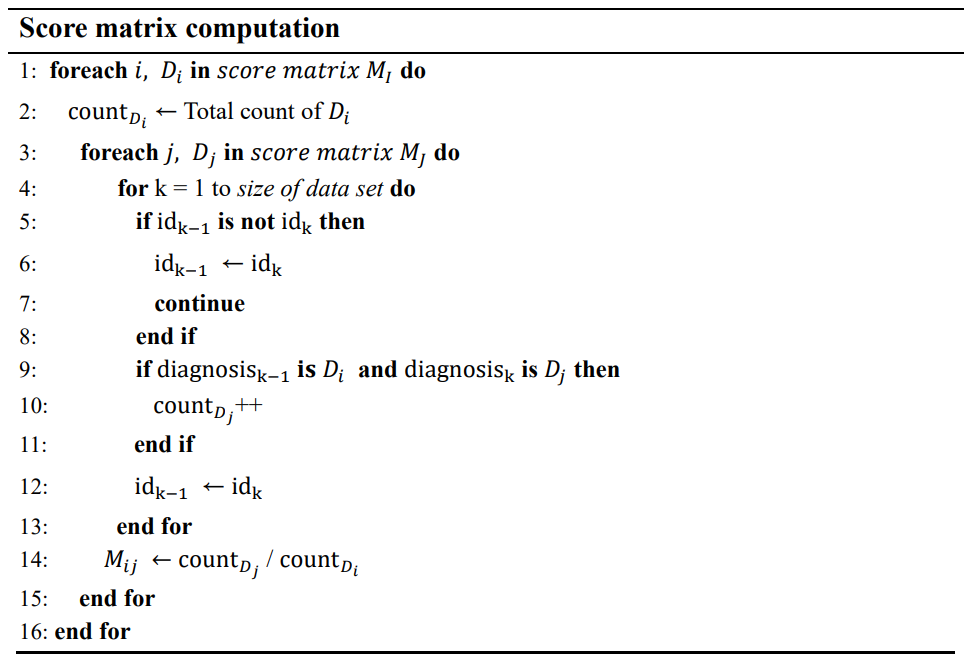

In [10]:
from tqdm.notebook import tqdm

prev = np_patients[:np_patients.shape[0]-1] # 이전 데이터
next = np_patients[1:] # 다음 데이터

for i, D_i in enumerate(tqdm(diagnosis)): # i: index || D_i: diagnosis of index ith
    countOfD_i = np.count_nonzero(np_patients == D_i) # 이전 진단 D_i의 개수
    for j, D_j in enumerate(diagnosis): # j: index || D_j: diagnosis of index jth
        countOfD_j = 0
        for k in range(np_patients.shape[0]-1): # size-1 of DataSet
            prev_id = prev[k, 0] # 이전 id
            next_id = next[k, 0] # 다음 id
            if prev_id != next_id: # id가 다를 경우 다음 사이클 이동
                continue

            prev_diagnosis = prev[k,2]  # 이전 진단명(k번째 행의 2번째 컬럼)
            next_diagnosis = next[k,2]  # 다음 진단명

            # 이전 진단 D_i을 갖는 이후 진단 D_j을 가진 개수
            if (prev_diagnosis == D_i) and (next_diagnosis == D_j): 
                countOfD_j += 1
                
        # 개수 비율 계산 후 score matrix i행 j열에 삽입
        score_matrix.iloc[i, j] = float(countOfD_j / countOfD_i) if countOfD_j != 0 else 0

score_matrix

  0%|          | 0/190 [00:00<?, ?it/s]

,I10,I11,I119,I109,I100,I8410,I849,I839,I8418,I209,...,I7023,I792,I620,I69,I744,I279,I059,I058,I2149,I2510
I10,0.909159,0.000453,0.004074,0.03033,0.005583,0,0.000905,0.001358,0,0.002716,...,0,0,0.000151,0,0,0,0.000302,0,0,0
I11,0.1875,0.71875,0.03125,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
I119,0.047059,0,0.829412,0.023529,0,0,0.002941,0,0,0.011765,...,0,0,0,0,0,0,0,0,0,0
I109,0.000441,0,0.000441,0.848458,0.004846,0.000881,0.000441,0,0.000881,0.001762,...,0,0,0,0,0,0,0.000881,0.000881,0,0
I100,0,0,0,0.045455,0.793939,0,0.00303,0,0,0,...,0,0,0,0,0,0,0,0,0.00303,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.8,0,0,0,0
I059,0.25,0,0,0.75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
I058,0,0,0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
I2149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.75,0.125


Score matrix 엑셀 파일 저장

In [11]:
# score_matrix.to_excel('Output/Score_Matrix.xlsx')